In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try: # Currently, memory growth needs to be the same across GPUs 
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e: # Memory growth must be set before GPUs have been initialized print(e)
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [13]:
import warnings
warnings.filterwarnings('ignore')

try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [14]:
data=tf.keras.datasets.cifar10
(train_X,train_Y),(test_X,test_Y)=data.load_data()

train_X=train_X/255.0
test_X=test_X/255.0

print(train_X.shape)
print(test_X.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


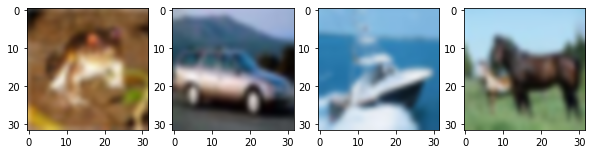

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(train_X[0],interpolation="bicubic")
plt.grid(False)

plt.subplot(1,4,2)
plt.imshow(train_X[4], interpolation="bicubic")
plt.grid(False)

plt.subplot(1,4,3)
plt.imshow(train_X[8],interpolation="bicubic")
plt.grid(False)

plt.subplot(1,4,4)
plt.imshow(train_X[12], interpolation="bicubic")
plt.grid(False)

In [16]:
train_Y=tf.keras.utils.to_categorical(train_Y,num_classes=10)
test_Y=tf.keras.utils.to_categorical(test_Y,num_classes=10)

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32,32,3),activation='relu',kernel_size=(3,3),filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),activation='relu',filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),activation='relu',filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
history=model.fit(train_X,train_Y,epochs=10,validation_split=0.25)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [17]:
model.evaluate(test_X,test_Y,verbose=0)

[0.9028362035751343, 0.707099974155426]

In [1]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}